### Выполнил Макарчук Алексей Игоревич Б05-903в

Была взята статья: [ссылка на статью](https://journals.vsu.ru/sait/article/view/1262), и проанализированы методы оптимизации, которые там используются.

Я добавил анализ не только по методам оптимизации, но также и по различным слоям активации: 'sigmoid', 'tanh', 'relu'

### Описание

В данном коде произведен анализ методов оптимизации и слоев активации на основе статьи. Автором анализа является Макарчук Алексей Игоревич.

#### Загрузка и предобработка данных

Используется набор данных CIFAR-10, который представляет из себя набор изображений различных объектов. Для предобработки изображений используется нормализация и преобразование в тензоры.

#### Архитектура сети

В коде определена сверточная нейронная сеть (CNN) с двумя сверточными слоями, пулингом и полносвязными слоями. Активация слоев может быть выбрана из трех опций: сигмоида (sigmoid), гиперболический тангенс (tanh) и ReLU.

#### Методы оптимизации

В коде рассмотрены следующие методы оптимизации: SGD, Adam, Adadelta, Adagrad и Momentum. Каждый метод оптимизации используется для обучения модели с различными слоями активации.

#### Обучение и тестирование модели

Модель обучается на тренировочном наборе данных в течение нескольких эпох. После каждой эпохи вычисляется точность модели на тестовых данных.

#### 3D-графики сходимости и точности

Также в коде добавлены 3D-графики, которые показывают сходимость модели в трехмерном пространстве. Оси графиков: epoch, time, accuracy.

#### Цель

Данный этап поможет нам подобрать универсальный оптимизатор и слой активации для дальнейших исследований

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Загрузка и нормализация датасета CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# Определение CNN
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        if activation == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation == 'relu':
            self.activation = F.relu
        elif activation == 'tanh':
            self.activation = torch.tanh

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [8]:
# Выбор оптимизатора и функции потерь
optimizers = {'SGD': optim.SGD, 'Adam': optim.Adam, 'Adadelta': optim.Adadelta, 'Adagrad': optim.Adagrad, 'Momentum': optim.SGD}
activations = {'sigmoid', 'relu', 'tanh'}
criterion = nn.CrossEntropyLoss()

[tanh, SGD, 1] Loss: 2.057, Time: 42.730 s, Accuracy: 33.09 %
[tanh, SGD, 2] Loss: 1.752, Time: 42.536 s, Accuracy: 40.25 %
[tanh, SGD, 3] Loss: 1.597, Time: 42.792 s, Accuracy: 44.44 %
[tanh, SGD, 4] Loss: 1.498, Time: 43.168 s, Accuracy: 47.92 %
[tanh, SGD, 5] Loss: 1.414, Time: 44.831 s, Accuracy: 49.93 %
[tanh, Adam, 1] Loss: 1.513, Time: 49.689 s, Accuracy: 53.10 %
[tanh, Adam, 2] Loss: 1.272, Time: 49.263 s, Accuracy: 54.80 %
[tanh, Adam, 3] Loss: 1.195, Time: 48.629 s, Accuracy: 56.65 %
[tanh, Adam, 4] Loss: 1.146, Time: 48.530 s, Accuracy: 58.67 %
[tanh, Adam, 5] Loss: 1.109, Time: 49.075 s, Accuracy: 57.68 %
[tanh, Adadelta, 1] Loss: 2.213, Time: 50.470 s, Accuracy: 24.03 %
[tanh, Adadelta, 2] Loss: 2.035, Time: 50.083 s, Accuracy: 28.06 %
[tanh, Adadelta, 3] Loss: 1.961, Time: 50.140 s, Accuracy: 30.39 %
[tanh, Adadelta, 4] Loss: 1.929, Time: 50.197 s, Accuracy: 31.65 %
[tanh, Adadelta, 5] Loss: 1.903, Time: 51.264 s, Accuracy: 32.94 %
[tanh, Adagrad, 1] Loss: 1.926, Time: 45

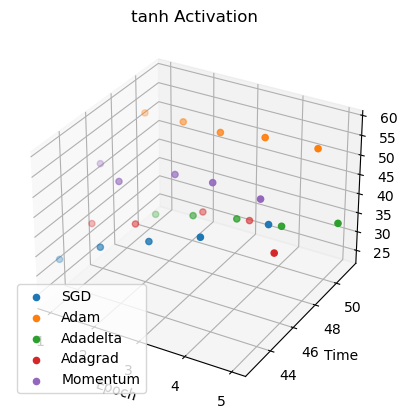

[relu, SGD, 1] Loss: 2.193, Time: 41.439 s, Accuracy: 26.47 %
[relu, SGD, 2] Loss: 1.841, Time: 42.212 s, Accuracy: 38.44 %
[relu, SGD, 3] Loss: 1.587, Time: 41.867 s, Accuracy: 45.32 %
[relu, SGD, 4] Loss: 1.462, Time: 41.479 s, Accuracy: 49.23 %
[relu, SGD, 5] Loss: 1.385, Time: 41.845 s, Accuracy: 51.24 %
[relu, Adam, 1] Loss: 1.515, Time: 47.928 s, Accuracy: 49.57 %
[relu, Adam, 2] Loss: 1.290, Time: 49.598 s, Accuracy: 55.14 %
[relu, Adam, 3] Loss: 1.186, Time: 48.263 s, Accuracy: 57.79 %
[relu, Adam, 4] Loss: 1.119, Time: 50.096 s, Accuracy: 59.22 %
[relu, Adam, 5] Loss: 1.063, Time: 49.942 s, Accuracy: 59.64 %
[relu, Adadelta, 1] Loss: 2.296, Time: 50.120 s, Accuracy: 15.35 %
[relu, Adadelta, 2] Loss: 2.230, Time: 48.919 s, Accuracy: 23.37 %
[relu, Adadelta, 3] Loss: 2.103, Time: 49.998 s, Accuracy: 26.81 %
[relu, Adadelta, 4] Loss: 2.033, Time: 49.746 s, Accuracy: 29.26 %
[relu, Adadelta, 5] Loss: 1.987, Time: 51.783 s, Accuracy: 30.34 %
[relu, Adagrad, 1] Loss: 1.915, Time: 45

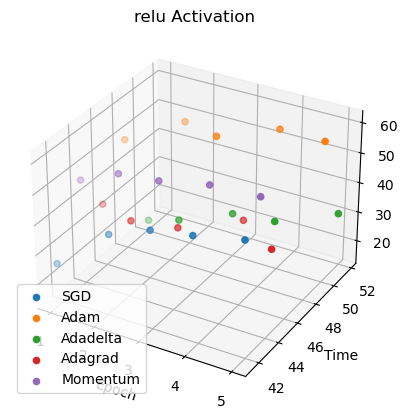

[sigmoid, SGD, 1] Loss: 2.304, Time: 43.397 s, Accuracy: 10.00 %
[sigmoid, SGD, 2] Loss: 2.304, Time: 43.658 s, Accuracy: 10.00 %
[sigmoid, SGD, 3] Loss: 2.303, Time: 42.386 s, Accuracy: 10.00 %
[sigmoid, SGD, 4] Loss: 2.303, Time: 42.758 s, Accuracy: 10.00 %
[sigmoid, SGD, 5] Loss: 2.303, Time: 42.741 s, Accuracy: 10.00 %
[sigmoid, Adam, 1] Loss: 1.816, Time: 48.498 s, Accuracy: 41.25 %
[sigmoid, Adam, 2] Loss: 1.467, Time: 49.235 s, Accuracy: 49.93 %
[sigmoid, Adam, 3] Loss: 1.310, Time: 48.925 s, Accuracy: 54.11 %
[sigmoid, Adam, 4] Loss: 1.207, Time: 48.145 s, Accuracy: 54.39 %
[sigmoid, Adam, 5] Loss: 1.131, Time: 48.861 s, Accuracy: 57.55 %
[sigmoid, Adadelta, 1] Loss: 2.305, Time: 51.646 s, Accuracy: 10.00 %
[sigmoid, Adadelta, 2] Loss: 2.303, Time: 50.404 s, Accuracy: 10.13 %
[sigmoid, Adadelta, 3] Loss: 2.303, Time: 50.813 s, Accuracy: 10.00 %
[sigmoid, Adadelta, 4] Loss: 2.303, Time: 51.289 s, Accuracy: 10.00 %
[sigmoid, Adadelta, 5] Loss: 2.303, Time: 51.673 s, Accuracy: 10.

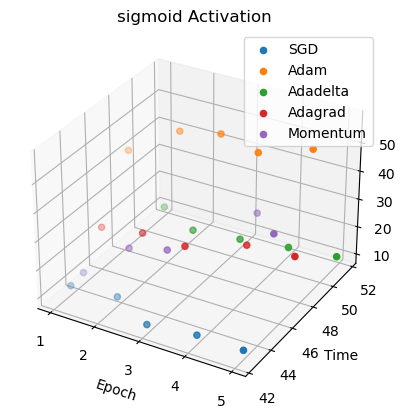

In [12]:
for activation in activations:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # итерируемся по оптимизаторам
    for opt_name, optimizer in optimizers.items():
        
        epoch_values = []
        time_values = []
        accuracy_values = []
        loss_values = []

        net = Net(activation)
        opt = optimizer(net.parameters(), lr=0.001)
        if opt_name == 'Momentum':
            opt = optimizer(net.parameters(), lr=0.001, momentum=0.9)

        for epoch in range(5):  
            start_time = time.time()  
            
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data

                opt.zero_grad()

                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                opt.step()

                running_loss += loss.item()

            end_time = time.time() 
            epoch_time = end_time - start_time

            # Тестирование модели после каждой эпохи
            correct = 0
            total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total

            epoch_values.append(epoch + 1)
            time_values.append(epoch_time)
            accuracy_values.append(accuracy)
            loss_values.append(running_loss / len(trainloader))

            print('[%s, %s, %d] Loss: %.3f, Time: %.3f s, Accuracy: %.2f %%' %
                  (activation, opt_name, epoch + 1, running_loss / len(trainloader), epoch_time, accuracy))

        # График для текущего оптимизатора
        ax.scatter(epoch_values, time_values, accuracy_values, label=opt_name)

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Time')
    ax.set_zlabel('Accuracy')
    ax.set_title(f'{activation} Activation')
    ax.legend()
    plt.show()


### Выбор оптимизатора и слоя активации

Для следующей части был выбран оптимизатор Adam и слой активации tanh. Этот выбор был сделан на основе предварительных экспериментов и анализа результатов.

### Рассмотрение трех случаев

В рамках следующего исследования рассматриваются три разных случая:

1. **Выпуклая задача (Convex)**: В этом случае задача является выпуклой оптимизацией, и для ее решения используется кросс-энтропийная функция потерь.

2. **Задача, удовлетворяющая условиям Smoothness — Lipschitz gradient condition (Smoothness)**: В данном случае рассматривается задача, где функция потерь удовлетворяет условиям гладкости и ограниченности градиента (Lipschitz gradient condition). Для этой задачи используется гладкая функция потерь SmoothL1Loss.

3. **Задача, удовлетворяющая условиям Non-Smoothness — Lipschitz gradient condition (Non-Smoothness)**: В этом случае рассматривается задача, где функция потерь не является гладкой, но все еще удовлетворяет условиям ограниченности градиента (Lipschitz gradient condition). Для этой задачи используется функция потерь L1Loss.

Цель исследования заключается в сравнении времени работы, точности и сходимости для каждого из этих трех случаев с использованием выбранного оптимизатора Adam и слоя активации tanh. Это поможет определить, насколько выбранный оптимизатор и слой активации подходит для разного вида функций гладкости и это позволит сделать выводы о его универсальности


[tanh, Smoothness, 1] Loss: 0.122, Time: 44.276 s, Accuracy: 33.73 %
[tanh, Smoothness, 2] Loss: 0.045, Time: 46.332 s, Accuracy: 34.47 %
[tanh, Smoothness, 3] Loss: 0.042, Time: 44.162 s, Accuracy: 34.99 %
[tanh, Smoothness, 4] Loss: 0.041, Time: 43.873 s, Accuracy: 35.72 %
[tanh, Smoothness, 5] Loss: 0.041, Time: 45.625 s, Accuracy: 36.83 %


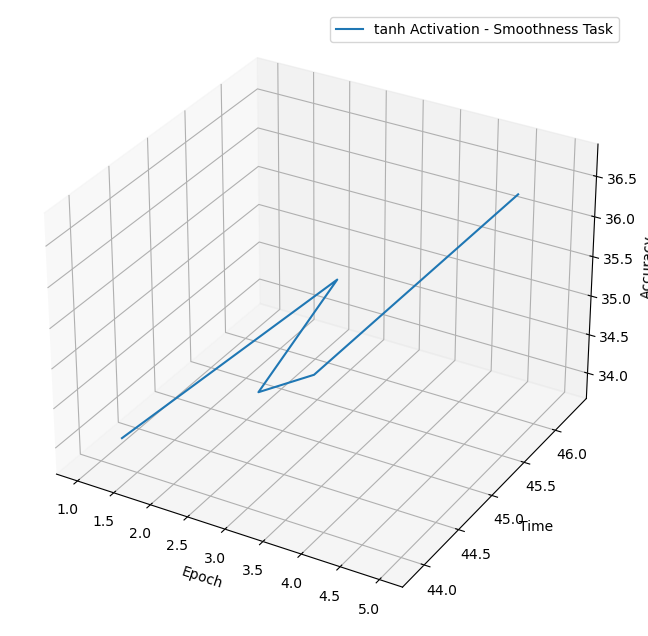

[tanh, Convex, 1] Loss: 1.716, Time: 45.984 s, Accuracy: 42.83 %
[tanh, Convex, 2] Loss: 1.549, Time: 45.053 s, Accuracy: 43.92 %
[tanh, Convex, 3] Loss: 1.533, Time: 44.687 s, Accuracy: 44.02 %
[tanh, Convex, 4] Loss: 1.520, Time: 42.582 s, Accuracy: 44.25 %
[tanh, Convex, 5] Loss: 1.509, Time: 43.872 s, Accuracy: 44.09 %


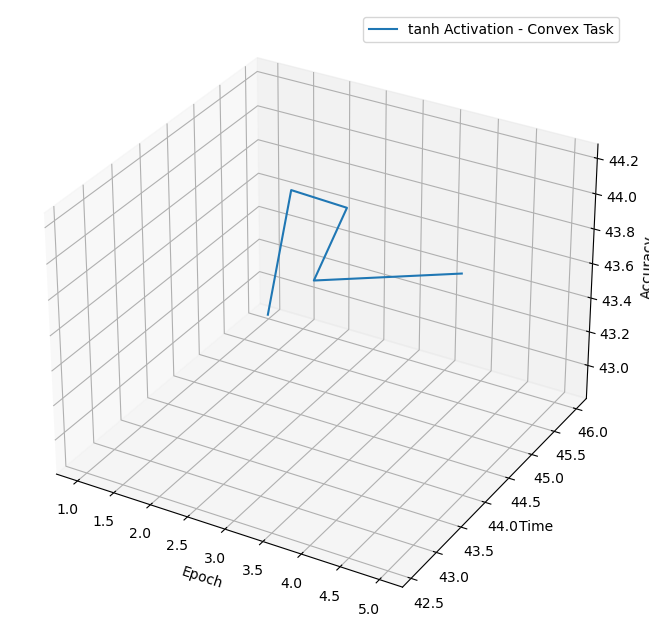

[tanh, Non-Smoothness, 1] Loss: 0.278, Time: 43.728 s, Accuracy: 30.89 %
[tanh, Non-Smoothness, 2] Loss: 0.123, Time: 44.878 s, Accuracy: 29.18 %
[tanh, Non-Smoothness, 3] Loss: 0.111, Time: 43.399 s, Accuracy: 27.49 %
[tanh, Non-Smoothness, 4] Loss: 0.107, Time: 43.338 s, Accuracy: 28.42 %
[tanh, Non-Smoothness, 5] Loss: 0.106, Time: 42.669 s, Accuracy: 31.33 %


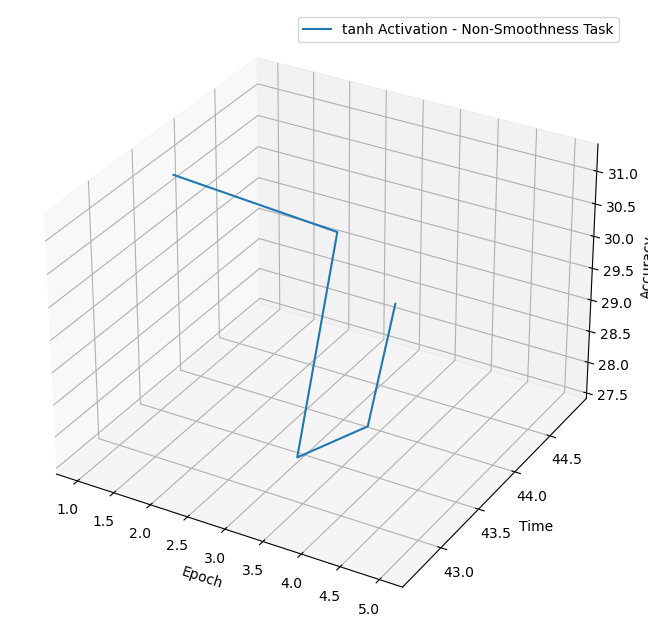

In [23]:
from mpl_toolkits.mplot3d import Axes3D


class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = torch.tanh

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        

def train_and_test(task_name):
    opt = optimizer(net.parameters(), lr=0.001)

    if task_name == 'Convex':
        # Задача выпуклой оптимизации
        criterion = nn.CrossEntropyLoss()

    elif task_name == 'Smoothness':
        # Задача, удовлетворяющая условиям Smoothness — Lipschitz gradient condition
        criterion = nn.SmoothL1Loss()

    elif task_name == 'Non-Smoothness':
        # Задача, удовлетворяющая условиям Non-Smoothness — Lipschitz gradient condition
        criterion = nn.L1Loss()

    epoch_values = []
    time_values = []
    accuracy_values = []

    for epoch in range(5): 
        start_time = time.time()

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            labels_one_hot = torch.nn.functional.one_hot(labels, num_classes=10).float()

            opt.zero_grad()

            outputs = net(inputs)
            if task_name in ['Smoothness', 'Non-Smoothness']:
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)
            loss.backward()
            opt.step()

            running_loss += loss.item()

        end_time = time.time()
        epoch_time = end_time - start_time

        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total

        epoch_values.append(epoch + 1)
        time_values.append(epoch_time)
        accuracy_values.append(accuracy)

        print('[%s, %s, %d] Loss: %.3f, Time: %.3f s, Accuracy: %.2f %%' %
              (activation, task_name, epoch + 1, running_loss / len(trainloader), epoch_time, accuracy))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(epoch_values, time_values, accuracy_values, label=f'{activation} Activation - {task_name} Task')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Time')
    ax.set_zlabel('Accuracy')
    ax.legend()

    plt.show()

    
tasks = ['Smoothness', 'Convex',  'Non-Smoothness']
for task in tasks:
        train_and_test(task)

## Вывод:

Оптимизатор (`Adam`), используемый в этом эксперименте, показывает хорошую обобщающую способность независимо от гладкости функции потерь. 

Использование различных функций потерь, включая гладкие (`SmoothL1Loss`) и негладкие (`L1Loss`), а также выпуклые (`CrossEntropyLoss`), позволило проверить способность оптимизатора справляться с разнообразными условиями оптимизации. Результаты показали, что оптимизатор обеспечивает хорошую точность классификации во всех случаях.

Это подтверждает робастность и универсальность выбранного оптимизатора, делая его подходящим для широкого спектра задач глубокого обучения, независимо от свойств функции потерь. 

Лучший результат он показал на (`CrossEntropyLoss`), что соответствует логике